In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ds = pd.read_csv("water.csv")

In [ ]:
ds = ds[ds['ammonia']!='#NUM!']

In [ ]:
ds['ammonia'] = ds['ammonia'].astype('float')
ds['is_safe'] = ds['is_safe'].astype('int')

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [ ]:
X = ds.drop(columns=['is_safe'], axis = 1)
y = ds['is_safe']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Selecting random forest and doing prediction before PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion=  'entropy', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

rf.fit(X_train, y_train)

y_pred_rfc_before_pca  = rf.predict(X_test)

from sklearn.metrics import classification_report

print("Classification Report before PCA: \n")
print(classification_report(y_pred_rfc_before_pca, y_test))

Classification Report before PCA: 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1462
           1       0.70      0.93      0.80       138

    accuracy                           0.96      1600
   macro avg       0.85      0.95      0.89      1600
weighted avg       0.97      0.96      0.96      1600



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(6396, 15)

In [ ]:
rf.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
y_pred_rfc_after_pca  = rf.predict(X_test_pca)

print("Classification Report after PCA: \n")
print(classification_report(y_pred_rfc_after_pca, y_test))

Classification Report after PCA: 

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1528
           1       0.30      0.76      0.43        72

    accuracy                           0.91      1600
   macro avg       0.65      0.84      0.69      1600
weighted avg       0.96      0.91      0.93      1600



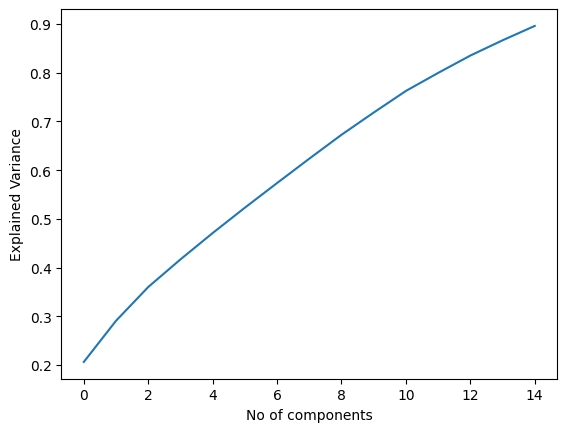

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
plt.ylabel("Explained Variance")
plt.show()